In [33]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [34]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Waters and Lange calibratin datat

In [35]:
Cali=pt.return_cali_dataset(model="Waters2015")
Cali
CalcWL_cali=pt.calculate_fspar_liq_hygr(XAn=Cali['XAn'], XAb=Cali['XAb'], T=pd.Series(Cali['T\n(°C)']+0.00001+273.15),
                                        liq_comps=Cali, equationH="H_Waters2015", P=Cali['P\n(bars)']/1000)

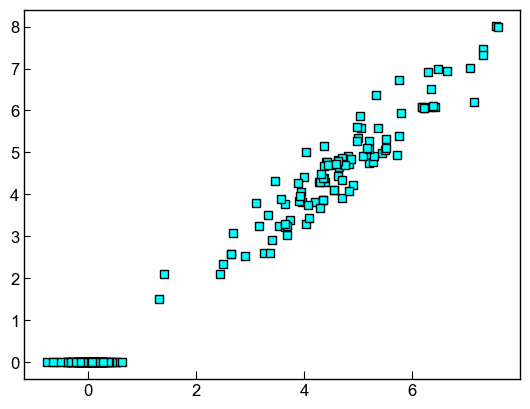

In [36]:
plt.plot(CalcWL_cali['H2O_calc'], Cali['H2O_Liq'], 'sk', mfc='cyan')

In [37]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Plag-Liq')
myPlags1=out['Plags']
myLiquids1=out['Liqs']
Plag_Glass=out['my_input']
notinLEPR= Plag_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InWaters=((Plag_Glass['Citation_x'].str.contains('Berndt2005_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Rader2013_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Parmon2011_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Costa2004_notinLEPR'))|
(Plag_Glass['Citation_x'].str.contains('Waters2020_notinLEPR'))
)
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Plag_Glass['P_kbar_x']<20
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask&(~InWaters)
Press_new=Press_new.fillna(False)

Eq_tests=pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myPlags1, P=Plag_Glass['P_kbar_x'], T=Plag_Glass['T_K_x'])
# Keith suggests best equilibrium test is Observed Kd (Ab-An)
Eq_Mask=Plag_Glass['T_K_x']>0
xT=Plag_Glass['T_K_x'].loc[Press_new&Eq_Mask]
xH=Plag_Glass['H2O_Liq'].loc[Press_new&Eq_Mask]

x=Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]

#Filt=Press_new&Eq_Mask

C:\Users\penny\AppData\Local\Temp\ipykernel_26448\4255604774.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Plag_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Plag_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## sorting by water amounts

In [38]:
Test_input_All=out['my_input']
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
Quantmethod=(FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)



In [39]:
100*sum(VBD_cal_mask&Press_new)/sum(Press_new)

16.228070175438596

In [40]:
sum(Sol_mask&Press_new)

78

In [41]:
sum(VBD_cal_mask&Press_new)

74

In [42]:
sum(Quantmethod&Press_new)-sum(VBD_cal_mask&Press_new)

86

In [43]:
100*sum(Quantmethod&Press_new)/sum(Press_new)

35.08771929824562

## H2O figure for supplement


In [74]:
Calc_Global_It=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  equationT="T_Put2008_eq24a",
                                       P=Plag_Glass['P_kbar_x'])
Iter_TH_T=Calc_Global_It['T_H_calc']

20


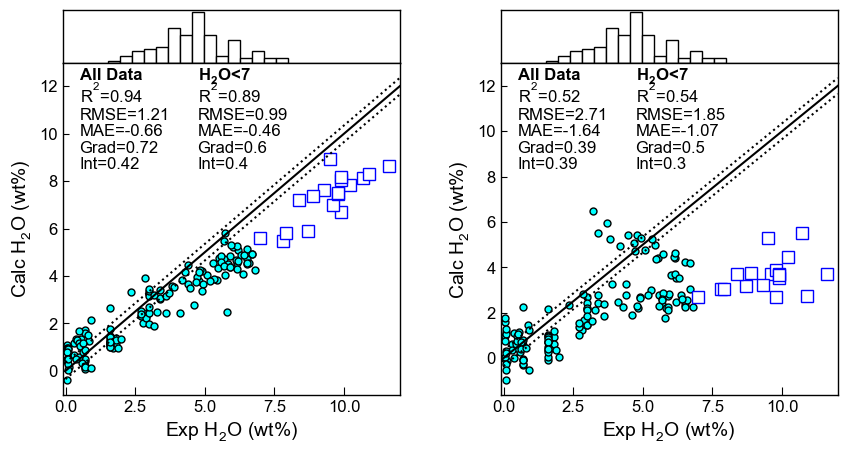

In [76]:
fig, (((ax3b),(ax3a)), ((ax1), (ax2))) = plt.subplots(2, 2, figsize=(10,5),gridspec_kw={'height_ratios': [0.8, 5]})
plt.subplots_adjust(wspace=0.3, hspace=0)
cut=0
# Plotting calibration dataset for Waters and Lang ontop of each plot
ax3b.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)
ax3a.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)

# Waters and Lang when you know the temperature. 
ax1.plot(xH.loc[Quantmethod], H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod], 'ok', ms=5, mfc='cyan')
LowWater=Plag_Glass['H2O_Liq']<7
HighWater=~LowWater

ax1.plot(xH.loc[Quantmethod&HighWater], 
H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater],  
         'sb', mew=1, mfc='white', ms=8)

ax1.plot([0, 12], [0, 12], '-k')
ax1.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax1.plot([0, 12], [0-0.35, 12-0.35], ':k')
Stats_KnownT=pt.calculate_R2(xH.loc[Quantmethod],
                      H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod])
ax1.annotate('All Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_KnownT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_KnownT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_KnownT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_KnownT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_KnownT['Int'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Exp H$_2$O (wt%)')
ax1.set_ylabel('Calc H$_2$O (wt%)')
#ax1.set_title('Waters and Lange (2015)')
#ax1.set_title('Experimental Temp')

Stats_lowH=pt.calculate_R2(xH.loc[Quantmethod&LowWater], 
                            H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&LowWater])

ax1.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_lowH['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_lowH['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_lowH['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_lowH['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_lowH['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)

## Now, say we dont know T #####################333

ax2.plot(xH.loc[Quantmethod], 
Iter_TH_T['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod],  
         'ok', ms=5, mfc='cyan')

ax2.plot(xH.loc[Quantmethod&HighWater], 
Iter_TH_T['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater],  
         'sb', mew=1,  mfc='white', ms=8)
ax2.plot([0, 12], [0, 12], '-k')
ax2.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax2.plot([0, 12], [0-0.35, 12-0.35], ':k')
ax2.set_xlabel('Exp H$_2$O (wt%) ')
ax2.set_ylabel('Calc H$_2$O (wt%) ')
ax2.plot()

# Statistics for all iteration
Stats_IterT=pt.calculate_R2(xH.loc[Quantmethod], 
                            Iter_TH_T['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod])
ax2.annotate('All Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_IterT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_IterT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_IterT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)



# Restric to >1250K



Stats_Iter_lowWater=pt.calculate_R2(xH.loc[Quantmethod&LowWater], 
                            Iter_TH_T['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&LowWater])

ax2.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_Iter_lowWater['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_Iter_lowWater['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_Iter_lowWater['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_Iter_lowWater['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_Iter_lowWater['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)



# lowT=~HighT
# Stats_lowT=pt.calculate_R2(xH.loc[Quantmethod&lowT], 
#                             Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&lowT])

# ax2.annotate('T<1000°C',  xy=(0.35, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
# ax2.annotate("R$^{2}$="+str(Stats_lowT['R2']), xy=(0.35, 0.89),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("RMSE="+str(Stats_lowT['RMSE']), xy=(0.35, 0.85),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("Grad="+str(np.round(Stats_lowT['Grad'], 2))[1:4], xy=(0.35, 0.8),
# xycoords="axes fraction", fontsize=12)

ax3b.axes.get_yaxis().set_visible(False)
ax3b.axes.get_xaxis().set_visible(False)

ax3a.axes.get_yaxis().set_visible(False)
ax3a.axes.get_xaxis().set_visible(False)

ax3b.set_xlim([-0.1, 12])
ax3a.set_xlim([-0.1, 12])
ax1.set_xlim([-0.1, 12])
ax2.set_xlim([-0.1, 12])

fig.savefig('Water_Statistics_PlagLiq_TrueQuant.png', dpi=200)

In [44]:
Test_input_All['Citation_x'].loc[Sol_mask].unique()

array(['Kraw2013_notinLEPR', 'Mandler2013_notinLEPR',
       'Costa2004_notinLEPR', 'Andujar2015_notinLEPR',
       'Waters2020_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR', 'Solaro2019_notinLEPR'], dtype=object)

## How many do different measurement techniques

In [45]:
total_len=sum(Press_new)
print('Truly quantiative methods')
print(sum(Quantmethod1&Press_new)/total_len)
print('New ones doing FTIR')
print(sum(FTIR_mask&Press_new)/total_len)
print('New ones doing SIMS')
print(sum(SIMS_mask&Press_new)/total_len)
print('New ones doing Raman')
print(sum(Raman_mask&Press_new)/total_len)
print('Ones using solubility models')
print(sum(Sol_mask&Press_new)/total_len)
print('VBD method calibrated')
print(sum(VBD_cal_mask&Press_new)/total_len)
print('VBD method not calibrated')
print(sum(VBD_mask&Press_new)/total_len-sum(VBD_cal_mask&Press_new)/total_len)



Truly quantiative methods
0.43201754385964913
New ones doing FTIR
0.3333333333333333
New ones doing SIMS
0.05043859649122807
New ones doing Raman
0.04824561403508772
Ones using solubility models
0.17105263157894737
VBD method calibrated
0.16228070175438597
VBD method not calibrated
0.19517543859649122


## If we known temperature

In [46]:
Calc_Global=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  T=Plag_Glass['T_K_x'],
                                       P=Plag_Glass['P_kbar_x'])

## IF we have to iterate temperature

In [47]:
Calc_Global_It=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationH="H_Waters2015",  equationT="T_Put2008_eq24a",
                                       P=Plag_Glass['P_kbar_x'])
pltiter=Calc_Global_It['T_H_calc']

20


## Summary statistical figure

## Water if know temperature

In [48]:
dict_HT_24a=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationT="T_Put2008_eq24a", equationH="H_Waters2015", P=5, iterations=30)
Calc_T_H_24a=dict_HT_24a['T_H_calc'] # Extracts calculated T and H2O
T_H_Iter_24a=dict_HT_24a['T_H_Evolution'] # Extracts EVolution of T and H against pressure

30


## Lets get waters calibration dataset. 

In [49]:
WL=pt.return_cali_dataset(model="Waters2015")

In [50]:
len(WL['H2O_Liq'].loc[WL['H2O_Liq']==0])/len(WL)

0.5

In [51]:
H2O_knownT=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        T=Plag_Glass['T_K_x'], equationH="H_Waters2015", P=Plag_Glass['P_kbar_x'])

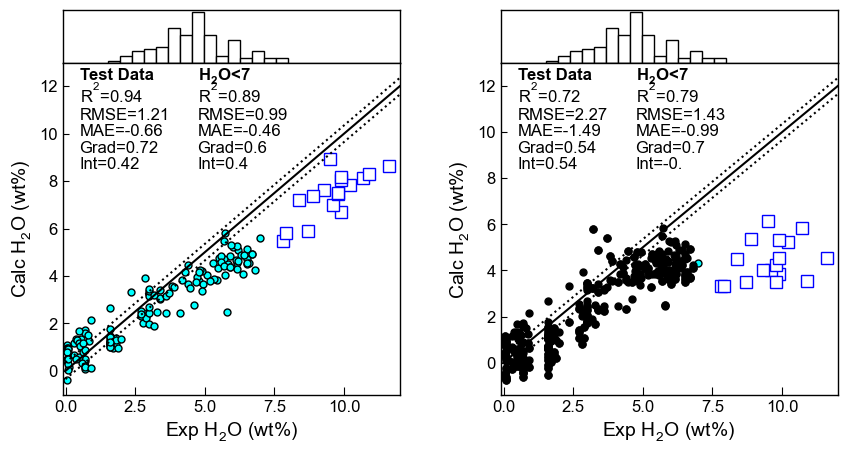

In [77]:
fig, (((ax3b),(ax3a)), ((ax1), (ax2))) = plt.subplots(2, 2, figsize=(10,5),gridspec_kw={'height_ratios': [0.8, 5]})
plt.subplots_adjust(wspace=0.3, hspace=0)
cut=0
ax3b.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)
ax3a.hist(WL['H2O_Liq'].loc[WL['H2O_Liq']>cut], ec='k', fc='white', bins=15)

ax1.plot(xH.loc[Quantmethod], H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod], 'ok', ms=5, mfc='cyan')
HighWater=Plag_Glass['H2O_Liq']>7
ax1.plot(xH.loc[Quantmethod&HighWater], 
H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater],  
         'sb', mew=1, mfc='white', ms=8)

ax1.plot([0, 12], [0, 12], '-k')
ax1.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax1.plot([0, 12], [0-0.35, 12-0.35], ':k')
Stats_KnownT=pt.calculate_R2(xH.loc[Quantmethod],
                      H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod])
ax1.annotate('Test Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_KnownT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_KnownT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_KnownT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_KnownT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_KnownT['Int'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Exp H$_2$O (wt%)')
ax1.set_ylabel('Calc H$_2$O (wt%)')
#ax1.set_title('Waters and Lange (2015)')
#ax1.set_title('Experimental Temp')

ax2.plot(xH.loc[Quantmethod], 
Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod],  
         'ok', ms=5, mfc='cyan')

ax2.plot(xH.loc[Quantmethod&HighWater], 
Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater],  
         'sb', mew=1,  mfc='white', ms=8)
ax2.plot([0, 12], [0, 12], '-k')
ax2.plot([0, 12], [0+0.35, 12+0.35], ':k')
ax2.plot([0, 12], [0-0.35, 12-0.35], ':k')
ax2.set_xlabel('Exp H$_2$O (wt%) ')
ax2.set_ylabel('Calc H$_2$O (wt%) ')
ax2.plot()

Stats_IterT=pt.calculate_R2(xH.loc[Quantmethod], 
                            Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod])
ax2.annotate('Test Data',  xy=(0.05, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_IterT['R2']), xy=(0.05, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_IterT['RMSE']), xy=(0.05, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_IterT['Mean']), xy=(0.05, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_IterT['Grad'], 2))[1:5], xy=(0.05, 0.68),
xycoords="axes fraction", fontsize=12)



# Restric to >1250K

HighT=Plag_Glass['H2O_Liq']<7
ax2.plot(xH.loc[Quantmethod&HighT], 
Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT],  'ok', ms=5, mfc='black')

Stats_HighT=pt.calculate_R2(xH.loc[Quantmethod&HighT], 
                            Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT])

ax2.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_HighT['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_HighT['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_HighT['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_HighT['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_HighT['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)

# Restric to >1250K

ax2.plot(xH.loc[Quantmethod&HighT], 
H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT],  'ok', ms=5, mfc='black')

Stats_HighT=pt.calculate_R2(xH.loc[Quantmethod&HighT], 
                            H2O_knownT['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT])

ax1.annotate('H$_2$O<7',  xy=(0.4, 0.95),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate("R$^{2}$="+str(Stats_HighT['R2']), xy=(0.4, 0.88),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_HighT['RMSE']), xy=(0.4, 0.83),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_HighT['Mean']), xy=(0.4, 0.78),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_HighT['Grad'], 2))[1:4], xy=(0.4, 0.73),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_HighT['Int'], 2))[1:4], xy=(0.4, 0.68),
xycoords="axes fraction", fontsize=12)
# lowT=~HighT
# Stats_lowT=pt.calculate_R2(xH.loc[Quantmethod&lowT], 
#                             Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod&lowT])

# ax2.annotate('T<1000°C',  xy=(0.35, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
# ax2.annotate("R$^{2}$="+str(Stats_lowT['R2']), xy=(0.35, 0.89),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("RMSE="+str(Stats_lowT['RMSE']), xy=(0.35, 0.85),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("Grad="+str(np.round(Stats_lowT['Grad'], 2))[1:4], xy=(0.35, 0.8),
# xycoords="axes fraction", fontsize=12)

ax3b.axes.get_yaxis().set_visible(False)
ax3b.axes.get_xaxis().set_visible(False)

ax3a.axes.get_yaxis().set_visible(False)
ax3a.axes.get_xaxis().set_visible(False)

ax3b.set_xlim([-0.1, 12])
ax3a.set_xlim([-0.1, 12])
ax1.set_xlim([-0.1, 12])
ax2.set_xlim([-0.1, 12])

fig.savefig('Water_Statistics_PlagLiq_TrulyQuant.png', dpi=200)

(700.0, 1300.0)

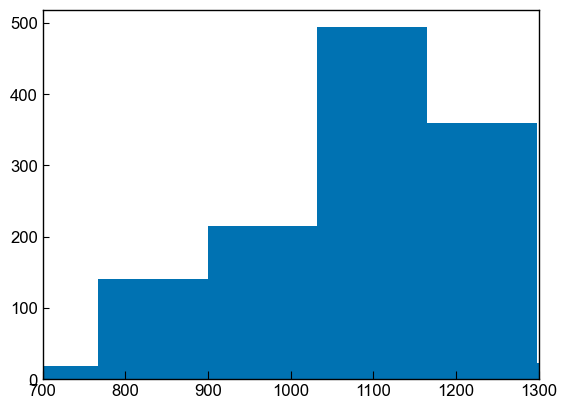

In [53]:
Putirka_Cali=pd.read_excel('Putirka_Plag_Liq_Cali.xlsx')
plt.hist(Putirka_Cali['T (C)'])
plt.xlim([700, 1300])

In [54]:
T_knownH2O=pt.calculate_fspar_liq_temp(liq_comps=myLiquids1, plag_comps=myPlags1, 
        H2O_Liq=Plag_Glass['H2O_Liq'], equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'], eq_tests=True)


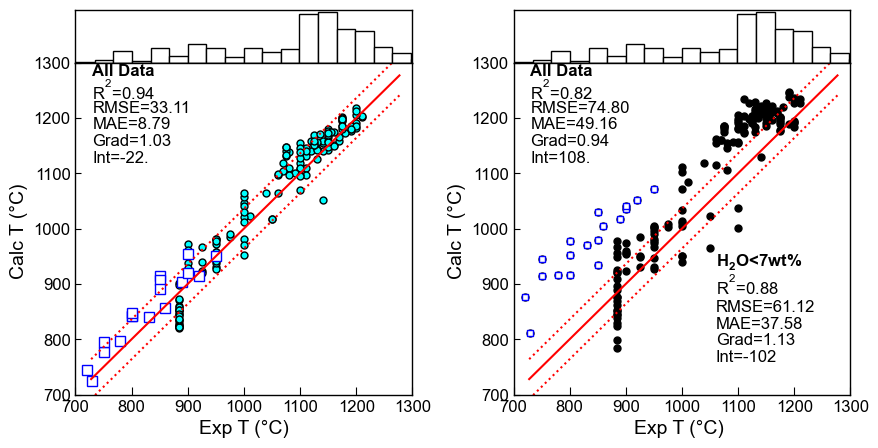

In [78]:
fig, (((ax3b),(ax3a)), ((ax1), (ax2))) = plt.subplots(2, 2, figsize=(10,5),
                                     gridspec_kw={'height_ratios': [0.8, 5]})
plt.subplots_adjust(wspace=0.3, hspace=0)
cut=0
ax3b.hist(Putirka_Cali['T (C)'].loc[Putirka_Cali['T (C)']>cut], ec='k', fc='white', bins=40)
ax3a.hist(Putirka_Cali['T (C)'].loc[Putirka_Cali['T (C)']>cut], ec='k', fc='white', bins=40)


ax1.plot(xT.loc[Quantmethod]-273.15, 
         T_knownH2O['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod]-273.15, 
         'ok', ms=5, mfc='cyan')

ax1.plot(xT.loc[Quantmethod&HighWater]-273.15, 
T_knownH2O['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater]-273.15,  
         'sb', mew=1, ms=7, mfc='white')

ax1.plot([1001-273.15, 1550-273.15], [1001-273.15, 1550-273.15], '-r')
ax1.plot([1001-273.15, 1550-273.15], [1001-273.15+36, 1550-273.15+36], ':r')
ax1.plot([1001-273.15, 1550-273.15], [1001-273.15-36, 1550-273.15-36], ':r')

Stats_KnownT=pt.calculate_R2(xT.loc[Quantmethod]-273.15,
                      T_knownH2O['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod]-273.15)

ax1.annotate("R$^{2}$="+str(Stats_KnownT['R2']), xy=(0.05, 0.89),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_KnownT['RMSE']), xy=(0.05, 0.85),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MAE="+str(Stats_KnownT['Mean']), xy=(0.05, 0.80),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_KnownT['Grad'], 2))[1:5], xy=(0.05, 0.75),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_KnownT['Int'], 2))[1:5], xy=(0.05, 0.70),
xycoords="axes fraction", fontsize=12)

#ax1.set_title('Waters and Lange (2015)')
#ax1.set_title('Experimental Temp')

ax2.plot(xT.loc[Quantmethod]-273.15, 
Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod]-273.15,  
         'ok', ms=5, mfc='black')

# HighT=Plag_Glass['H2O_Liq']<7
# ax2.plot(xT.loc[Quantmethod&HighT]-273.15, 
# Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT]-273.15,
#          'ok', ms=5, mfc='black')

ax2.plot(xT.loc[Quantmethod&HighWater]-273.15, 
Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighWater]-273.15,  
         'sb', mew=1, ms=5, mfc='white')


ax2.plot([1001-273.15, 1550-273.15], [1001-273.15, 1550-273.15], '-r')
ax2.plot([1001-273.15, 1550-273.15], [1001-273.15+36, 1550-273.15+36], ':r')
ax2.plot([1001-273.15, 1550-273.15], [1001-273.15-36, 1550-273.15-36], ':r')

ax2.plot()

Stats_IterT=pt.calculate_R2(xT.loc[Quantmethod]-273.15, 
Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod]-273.15)
# ax2.annotate('All Data',  xy=(0.05, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
ax1.annotate('All Data',  xy=(0.05, 0.96),
xycoords="axes fraction", fontsize=12, fontweight="bold")

ax2.annotate('All Data',  xy=(0.05, 0.96),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_IterT['R2']), xy=(0.05, 0.89),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_IterT['RMSE']), xy=(0.05, 0.85),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_IterT['Mean']), xy=(0.05, 0.80),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_IterT['Grad'], 4))[1:5], xy=(0.05, 0.75),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_IterT['Int'], 4))[1:5], xy=(0.05, 0.70),
xycoords="axes fraction", fontsize=12)

## High water cut off

HighWater=Plag_Glass['H2O_Liq']>7



## Restric to >1250K



Stats_HighT=pt.calculate_R2(xT.loc[Quantmethod&HighT]-273.15, 
Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighT]-273.15)

ax2.annotate('H$_2O$<7wt%',  xy=(0.6, 0.39),
xycoords="axes fraction", fontsize=12, fontweight="bold")
ax2.annotate("R$^{2}$="+str(Stats_HighT['R2']), xy=(0.6, 0.3),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(Stats_HighT['RMSE']), xy=(0.6, 0.25),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MAE="+str(Stats_HighT['Mean']), xy=(0.6, 0.20),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(Stats_HighT['Grad'], 2))[1:5], xy=(0.6, 0.15),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(Stats_HighT['Int'], 2))[1:5], xy=(0.6, 0.1),
xycoords="axes fraction", fontsize=12)
# lowT=~HighT
# Stats_lowT=pt.calculate_R2(xT.loc[Quantmethod&lowT]-273.15, 
# Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&lowT]-273.15)

# ax2.annotate('T<301°C',  xy=(0.35, 0.96),
# xycoords="axes fraction", fontsize=12, fontweight="bold")
# ax2.annotate("R$^{2}$="+str(Stats_lowT['R2']), xy=(0.35, 0.89),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("RMSE="+str(Stats_lowT['RMSE']), xy=(0.35, 0.85),
# xycoords="axes fraction", fontsize=12)
# ax2.annotate("Grad="+str(np.round(Stats_lowT['Grad'], 2))[1:5], xy=(0.35, 0.8),
# xycoords="axes fraction", fontsize=12)

# ax2x=ax1.twiny()
# ax2y=ax1.twinx()

ax3b.axes.get_yaxis().set_visible(False)
ax3b.axes.get_xaxis().set_visible(False)

ax3a.axes.get_yaxis().set_visible(False)
ax3a.axes.get_xaxis().set_visible(False)

ax1.set_xlim([700, 1300])
ax1.set_ylim([700, 1300])
ax2.set_xlim([700, 1300])
ax2.set_ylim([700, 1300])

ax3a.set_xlim([700, 1300])
ax3b.set_xlim([700, 1300])


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) ')
ax2.set_xlabel('Exp T (°C) ')
ax2.set_ylabel('Calc T (°C) ')

fig.savefig('Putirka24a_TempTest_TrulyQuant.png', dpi=200)

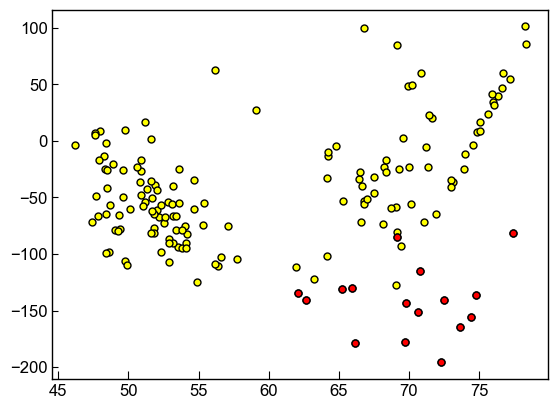

In [56]:
x='SiO2_Liq'
plt.plot(Calc_T_H_24a[x].loc[Press_new&Eq_Mask&Quantmethod],
         xT.loc[Quantmethod]-Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod],  
         'ok', ms=5, mfc='yellow')

HighH=Plag_Glass['H2O_Liq']>8
plt.plot(Calc_T_H_24a[x].loc[Press_new&Eq_Mask&Quantmethod&HighH],
         xT.loc[Quantmethod&HighH]-Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighH],  
         'ok', ms=5, mfc='red')

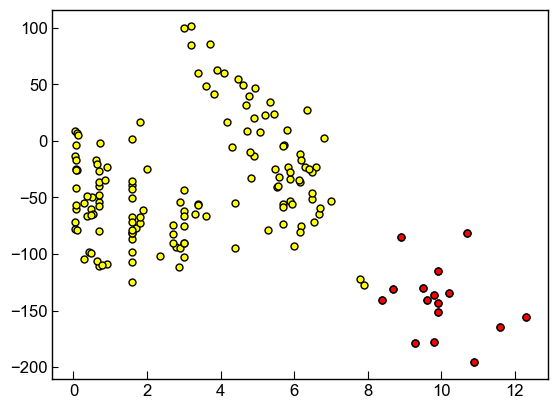

In [57]:
x='H2O_Liq'
plt.plot(Calc_T_H_24a[x].loc[Press_new&Eq_Mask&Quantmethod],
         xT.loc[Quantmethod]-Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod],  
         'ok', ms=5, mfc='yellow')

HighH=Plag_Glass['H2O_Liq']>8
plt.plot(Calc_T_H_24a[x].loc[Press_new&Eq_Mask&Quantmethod&HighH],
         xT.loc[Quantmethod&HighH]-Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod&HighH],  
         'ok', ms=5, mfc='red')

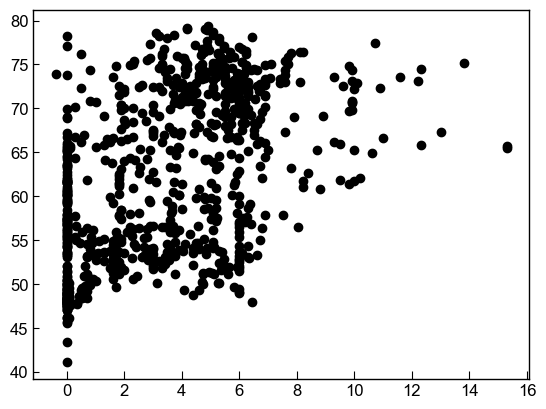

In [58]:
plt.plot(Plag_Glass['H2O_Liq'], Plag_Glass['SiO2_Liq'], 'ok')

In [59]:
Plag_Glass['Citation_x'].loc[Plag_Glass['H2O_Liq']>8].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8',
       'Pichavant, M., Martel, C., Bourdier, J.-L., Scaillet, B. (2002) Physical conditions, structure, and dynamics of a zoned magma chamber: Mount Pelée (Martinique, Lesser Antilles Arc). Journal of Geophysical Research 107 1-25. 10.1029/2001JB000315',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Ulmer2018_notinLEPR', 'Koepke2018_notinLEPR',
       'Marxer2022_notinLEPR', 'Solaro2019_notinLEPR',
       'Blatter2023_notinLEPR'], dtype=object)

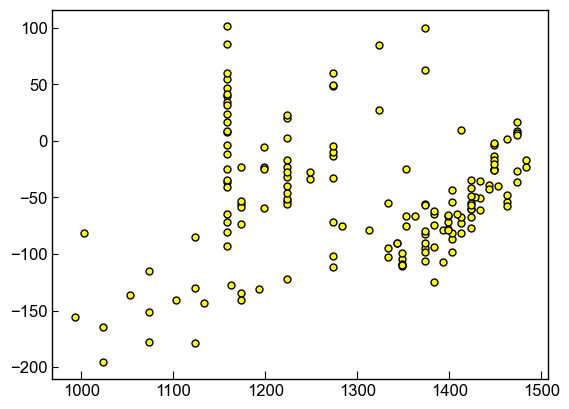

In [60]:
plt.plot(xT.loc[Quantmethod],
         xT.loc[Quantmethod]-Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod],  
         'ok', ms=5, mfc='yellow')

Text(0, 0.5, 'Exp H - Calc H')

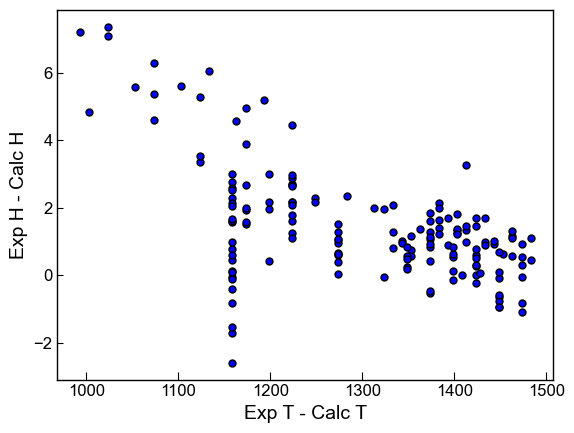

In [61]:
plt.plot(xT.loc[Quantmethod], 
         xH.loc[Quantmethod]-Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod], 
        
         'ok', ms=5, mfc='blue')
plt.xlabel('Exp T - Calc T')
plt.ylabel('Exp H - Calc H')

Text(0, 0.5, 'Exp H - Calc H')

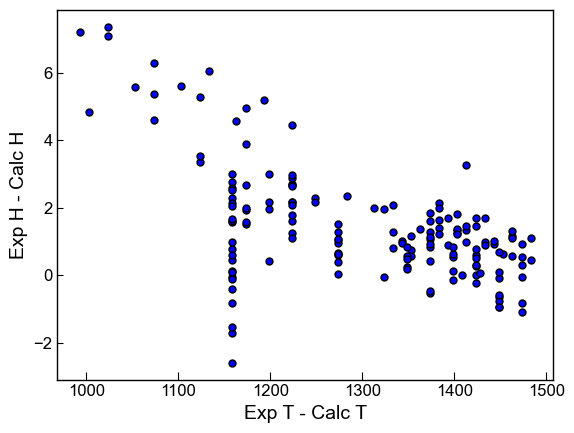

In [62]:
plt.plot(xT.loc[Quantmethod], 
         xH.loc[Quantmethod]-Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod], 
        
         'ok', ms=5, mfc='blue')
plt.xlabel('Exp T - Calc T')
plt.ylabel('Exp H - Calc H')

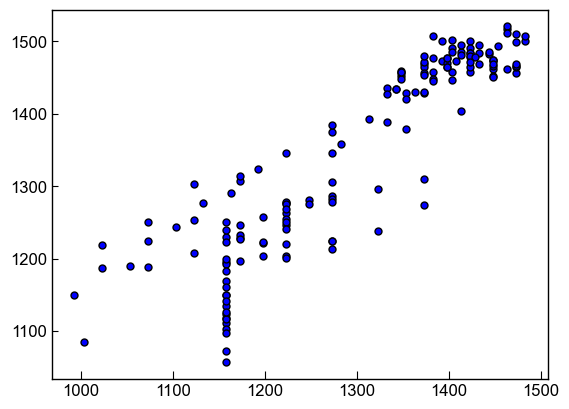

In [63]:
plt.plot(xT.loc[Quantmethod], Calc_T_H_24a['T_K_calc'].loc[Press_new&Eq_Mask&Quantmethod],  'ok', ms=5, mfc='blue')


## Iteration of H and T

In [64]:
dict_HT_24a=pt.calculate_fspar_liq_temp_hygr(liq_comps=myLiquids1, plag_comps=myPlags1, 
        equationT="T_Put2008_eq24a", equationH="H_Waters2015", P=5, iterations=30)
Calc_T_H_24a=dict_HT_24a['T_H_calc'] # Extracts calculated T and H2O
T_H_Iter_24a=dict_HT_24a['T_H_Evolution'] # Extracts EVolution of T and H against pressure

30


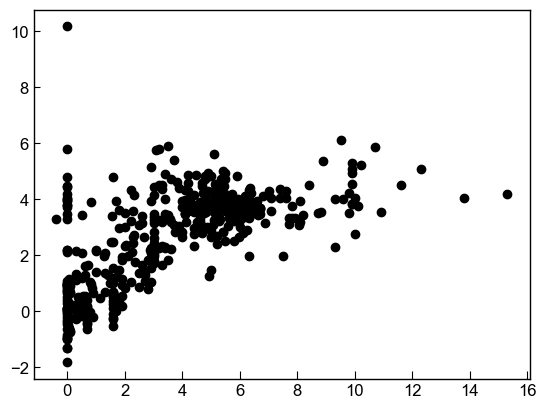

In [65]:
plt.plot(xH, Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask], 'ok')

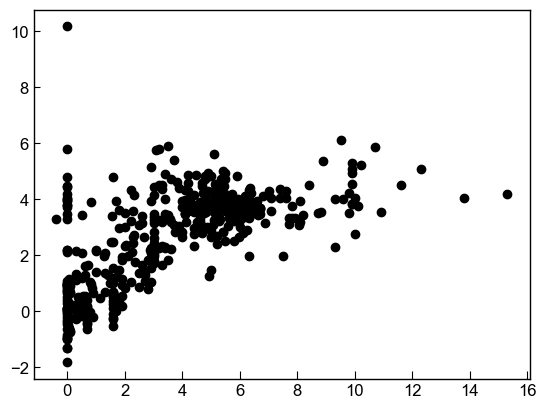

In [66]:
plt.plot(xH, Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask], 'ok')

{'R2': '0.72',
 'RMSE': '2.27',
 'RMSE_num': 2.26888,
 'P_val': '0.000',
 'Median': '-1.14',
 'Mean': '-1.49',
 'Int': array([0.2940433]),
 'Grad': array([0.5356422]),
 'x_pred': array([[ 0.7       ],
        [ 0.7       ],
        [ 0.7       ],
        [ 1.6       ],
        [ 1.7       ],
        [ 1.8       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 2.8       ],
        [ 2.9       ],
        [ 0.7       ],
        [ 1.6       ],
        [ 1.8       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 2.7       ],
        [ 0.6       ],
        [ 0.7       ],
        [ 0.7       ],
        [ 1.6       ],
        [ 1.9       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 2.9       ],
        [ 2.7       ],
        [ 0.9       ],
        [ 1.8       ],
        [ 1.6       ],
        [ 1.6       ],
        [ 3.        ],
        [ 2.7       ],
        [ 3.3       ],
        [ 3.4       ],
        [ 3.     

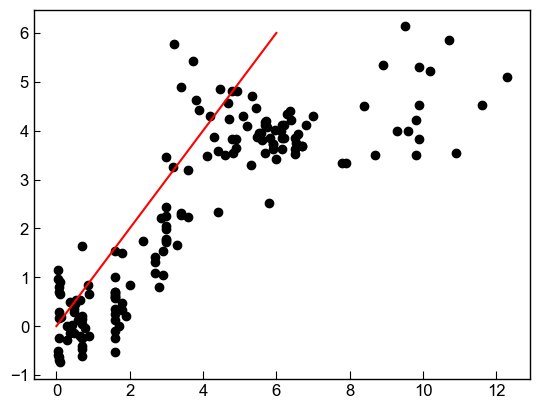

In [67]:
plt.plot(xH.loc[Quantmethod], Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod], 'ok')
plt.plot([0, 6], [0, 6], '-r')
Stats=pt.calculate_R2(xH.loc[Quantmethod], Calc_T_H_24a['H2O_calc'].loc[Press_new&Eq_Mask&Quantmethod])
Stats

Text(0, 0.5, 'Cr2O3 Liq')

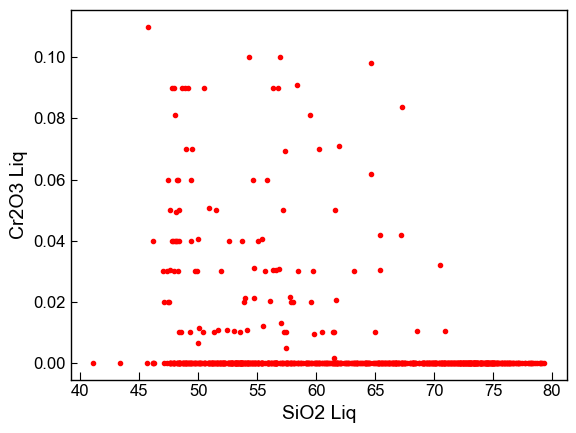

In [68]:
plt.plot(Plag_Glass['SiO2_Liq'], Plag_Glass['Cr2O3_Liq'], '.r')
plt.xlabel('SiO2 Liq')
plt.ylabel('Cr2O3 Liq')

(0.0, 0.1)

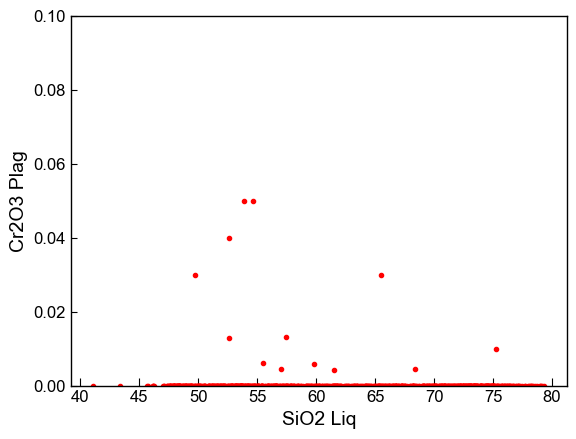

In [69]:
plt.plot(Plag_Glass['SiO2_Liq'], Plag_Glass['Cr2O3_Plag'], '.r')
plt.xlabel('SiO2 Liq')
plt.ylabel('Cr2O3 Plag')
plt.ylim([0, 0.1])

# Making a datatable of R2 values for various equations for pressure

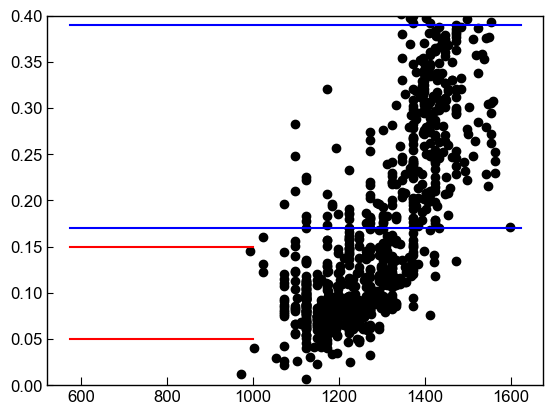

In [70]:
plt.plot(Plag_Glass['T_K_x'], Eq_tests['Obs_Kd_Ab_An'], 'ok')
plt.ylim([0, 0.4])
plt.plot([1000, 301+273.15], [0.05, 0.05], '-r')
plt.plot([1000, 301+273.15], [0.15, 0.15], '-r')
plt.plot([301+273.15, 1350+273.15], [0.17, 0.17], '-b')
plt.plot([301+273.15, 1350+273.15], [0.39, 0.39], '-b')

## Calculating pressure, Iterate T, known Water

In [72]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')

    
    Out_25_24a=pt.calculate_Fspar_Liq_PT_Iter(liq_comps=myLiquids1, plag_comps=myPlags1,  equationP="P_Put2008_eq25", equationT="T_Put2008_eq24a")
    y_25_24a=Out_25_24a.loc[Press_new&(Eq_Mask)]
    Eq_25_24a=pt.calculate_R2(x, y_25_24a['P_kbar_calc']) # 25 Fixed T
    TEq_25_24a=pt.calculate_R2(xT, y_25_24a['T_K_calc']) # 25 Fixed T
    

    Out_25_24a=pt.calculate_Fspar_Liq_PT_Iter(liq_comps=myLiquids1, plag_comps=myPlags1,  equationP="P_Put2008_eq25", equationT="T_Put2008_eq24a")
    y_25_24a=Out_25_24a.loc[Press_new&(Eq_Mask)]
    Eq_25_24a=pt.calculate_R2(x, y_25_24a['P_kbar_calc']) # 25 Fixed T
    TEq_25_24a=pt.calculate_R2(xT, y_25_24a['T_K_calc']) # 25 Fixed T   
    
    Out_25_24a_noH=pt.calculate_Fspar_Liq_PT_Iter(liq_comps=myLiquids1, plag_comps=myPlags1,  equationP="P_Put2008_eq25", equationT="T_Put2008_eq24a", H2O_Liq=0)
    y_25_24a_noH=Out_25_24a_noH.loc[Press_new&(Eq_Mask)]
    Eq_25_24a_noH=pt.calculate_R2(x, y_25_24a_noH['P_kbar_calc']) # 25 Fixed T
    TEq_25_24a_noH=pt.calculate_R2(xT, y_25_24a_noH['T_K_calc']) # 25 Fixed T
    

    Out_25_24a_noH=pt.calculate_Fspar_Liq_PT_Iter(liq_comps=myLiquids1, plag_comps=myPlags1,  equationP="P_Put2008_eq25", equationT="T_Put2008_eq24a", H2O_Liq=0)
    y_25_24a_noH=Out_25_24a_noH.loc[Press_new&(Eq_Mask)]
    Eq_25_24a_noH=pt.calculate_R2(x, y_25_24a_noH['P_kbar_calc']) # 25 Fixed T
    TEq_25_24a_noH=pt.calculate_R2(xT, y_25_24a_noH['T_K_calc']) # 25 Fixed T       
    
Dict_25_24a = {'R$^{2}$': Eq_25_24a['R2'], 'p val': Eq_25_24a['P_val'], 'RMSE (kbar)': Eq_25_24a['RMSE'], 'Median Error (kbar)': Eq_25_24a['Median'], 'Mean Error (kbar)': Eq_25_24a['Mean']}
Dict_25_24a = {'R$^{2}$': Eq_25_24a['R2'],  'p val': Eq_25_24a['P_val'],  'RMSE (kbar)': Eq_25_24a['RMSE'], 'Median Error (kbar)': Eq_25_24a['Median'], 'Mean Error (kbar)': Eq_25_24a['Mean']}
TDict_25_24a = {'R$^{2}$': TEq_25_24a['R2'],  'p val': TEq_25_24a['P_val'], 'RMSE (°C)': TEq_25_24a['RMSE'], 'Median Error (°C)': TEq_25_24a['Median'], 'Mean Error (°C)': TEq_25_24a['Mean']}
TDict_25_24a = {'R$^{2}$': TEq_25_24a['R2'], 'p val': TEq_25_24a['P_val'], 'RMSE (°C)': TEq_25_24a['RMSE'], 'Median Error (°C)': TEq_25_24a['Median'], 'Mean Error (°C)': TEq_25_24a['Mean']}

Dict_25_24a_noH = {'R$^{2}$': Eq_25_24a_noH['R2'], 'p val': Eq_25_24a_noH['P_val'], 'RMSE (kbar)': Eq_25_24a_noH['RMSE'], 'Median Error (kbar)': Eq_25_24a_noH['Median'], 'Mean Error (kbar)': Eq_25_24a_noH['Mean']}
Dict_25_24a_noH = {'R$^{2}$': Eq_25_24a_noH['R2'],  'p val': Eq_25_24a_noH['P_val'],  'RMSE (kbar)': Eq_25_24a_noH['RMSE'], 'Median Error (kbar)': Eq_25_24a_noH['Median'], 'Mean Error (kbar)': Eq_25_24a_noH['Mean']}
TDict_25_24a_noH = {'R$^{2}$': TEq_25_24a_noH['R2'],  'p val': TEq_25_24a_noH['P_val'], 'RMSE (°C)': TEq_25_24a_noH['RMSE'], 'Median Error (°C)': TEq_25_24a_noH['Median'], 'Mean Error (°C)': TEq_25_24a_noH['Mean']}
TDict_25_24a_noH = {'R$^{2}$': TEq_25_24a_noH['R2'], 'p val': TEq_25_24a_noH['P_val'], 'RMSE (°C)': TEq_25_24a_noH['RMSE'], 'Median Error (°C)': TEq_25_24a_noH['Median'], 'Mean Error (°C)': TEq_25_24a_noH['Mean']}


AttributeError: module 'Thermobar' has no attribute 'calculate_Fspar_Liq_PT_Iter'

## Summary table for pressure - known water contents

In [ ]:
SummaryTable_WithWater=pd.DataFrame({
                           'P=Put2008_25, T=Exp, H2O=Exp':pd.Series(Dict_25_FixedT),   
                           'P=Put2008_eq25, T=Put2008_eq24a, H2O=Exp':pd.Series(Dict_25_24a), 
                           'P=Put2008_eq25, T=Put2008_eq24a, H2O=Exp':pd.Series(Dict_25_24a),   
                             
                                    }       
).T
SummaryTable_WithWater

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,p val,RMSE (kbar),Median Error (kbar),Mean Error (kbar)
"P=Put2008_25, T=Exp, H2O=Exp",0.00,0.641,3.87,-1.04,-1.45
"P=Put2008_eq25, T=Put2008_eq23, H2O=Exp",0.04,0.000,4.58,-0.95,-1.61
"P=Put2008_eq25, T=Put2008_eq24a, H2O=Exp",0.04,0.000,4.42,-0.72,-1.42


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


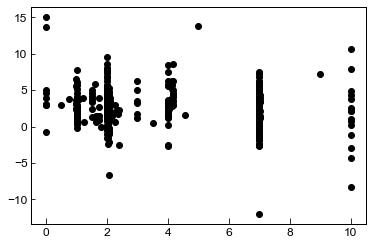

In [ ]:
plt.plot(x, y_25_24a['P_kbar_calc'], 'ok')

In [ ]:
Out_24a_FixedP=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'])
y_24a_FixedP=Out_24a_FixedP.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP=pt.calculate_R2(xT,y_24a_FixedP) 
TDict_24a_FixedP = {'R$^{2}$': Eq_24a_FixedP['R2'], 'p val': Eq_24a_FixedP['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP['RMSE'], 'Median Error (°C)': Eq_24a_FixedP['Median'], 'Mean Error (°C)': Eq_24a_FixedP['Mean']}

Out_24a_FixedP=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'])
y_24a_FixedP=Out_24a_FixedP.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP=pt.calculate_R2(xT,y_24a_FixedP) 
TDict_24a_FixedP = {'R$^{2}$': Eq_24a_FixedP['R2'], 'p val': Eq_24a_FixedP['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP['RMSE'], 'Median Error (°C)': Eq_24a_FixedP['Median'], 'Mean Error (°C)': Eq_24a_FixedP['Mean']}

Out_24a_FixedP_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'], H2O_Liq=0)
y_24a_FixedP_noH=Out_24a_FixedP_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_noH=pt.calculate_R2(xT,y_24a_FixedP_noH) 
TDict_24a_FixedP_noH = {'R$^{2}$': Eq_24a_FixedP_noH['R2'], 'p val': Eq_24a_FixedP_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_noH['Mean']}

Out_24a_FixedP_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=Plag_Glass['P_kbar_x'], H2O_Liq=0)
y_24a_FixedP_noH=Out_24a_FixedP_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_noH=pt.calculate_R2(xT,y_24a_FixedP_noH) 
TDict_24a_FixedP_noH = {'R$^{2}$': Eq_24a_FixedP_noH['R2'], 'p val': Eq_24a_FixedP_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_noH['Mean']}



Out_24a_FixedP_P5=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=5)
y_24a_P5=Out_24a_FixedP_P5.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P5=pt.calculate_R2(xT,y_24a_P5) 
TDict_24a_FixedP_P5 = {'R$^{2}$': Eq_24a_FixedP_P5['R2'], 'p val': Eq_24a_FixedP_P5['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P5['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P5['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P5['Mean']}

Out_24a_FixedP_P0=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=0)
y_24a_P0=Out_24a_FixedP_P0.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P0=pt.calculate_R2(xT,y_24a_P0) 
TDict_24a_FixedP_P0 = {'R$^{2}$': Eq_24a_FixedP_P0['R2'], 'p val': Eq_24a_FixedP_P0['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P0['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P0['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P0['Mean']}

Out_24a_FixedP_P0=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=0)
y_24a_P0=Out_24a_FixedP_P0.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P0=pt.calculate_R2(xT,y_24a_P0) 
TDict_24a_FixedP_P0 = {'R$^{2}$': Eq_24a_FixedP_P0['R2'], 'p val': Eq_24a_FixedP_P0['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P0['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P0['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P0['Mean']}


Out_24a_FixedP_P5_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=5, H2O_Liq=0)
y_24_P5_noH=Out_24a_FixedP_P5_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P5_noH=pt.calculate_R2(xT,y_24_P5_noH) 
TDict_24a_FixedP_P5_noH = {'R$^{2}$': Eq_24a_FixedP_P5_noH['R2'], 'p val': Eq_24a_FixedP_P5_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P5_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P5_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P5_noH['Mean']}



Out_24a_FixedP_P5_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=5, H2O_Liq=0)
y_24a_P5_noH=Out_24a_FixedP_P5_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P5_noH=pt.calculate_R2(xT,y_24a_P5_noH) 
TDict_24a_FixedP_P5_noH = {'R$^{2}$': Eq_24a_FixedP_P5_noH['R2'], 'p val': Eq_24a_FixedP_P5_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P5_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P5_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P5_noH['Mean']}

Out_24a_FixedP_P0_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=0, H2O_Liq=0)
y_24a_P0_noH=Out_24a_FixedP_P0_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P0_noH=pt.calculate_R2(xT,y_24a_P0_noH) 
TDict_24a_FixedP_P0_noH = {'R$^{2}$': Eq_24a_FixedP_P0_noH['R2'], 'p val': Eq_24a_FixedP_P0_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P0_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P0_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P0_noH['Mean']}

Out_24a_FixedP_P0_noH=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a", P=0, H2O_Liq=0)
y_24a_P0_noH=Out_24a_FixedP_P0_noH.loc[Press_new&(Eq_Mask)]
Eq_24a_FixedP_P0_noH=pt.calculate_R2(xT,y_24a_P0_noH) 
TDict_24a_FixedP_P0_noH = {'R$^{2}$': Eq_24a_FixedP_P0_noH['R2'], 'p val': Eq_24a_FixedP_P0_noH['P_val'], 
                   'RMSE (°C)': Eq_24a_FixedP_P0_noH['RMSE'], 'Median Error (°C)': Eq_24a_FixedP_P0_noH['Median'], 'Mean Error (°C)': Eq_24a_FixedP_P0_noH['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Assessing temperature, using R2 etc. 

In [ ]:


Temp_knownH=pd.DataFrame({'T=Put2008_eq24a, P=Exp':pd.Series(TDict_24a_FixedP),
                           'T=Put2008_eq24a, P=Exp':pd.Series(TDict_24a_FixedP),
                        'T=Put2008_eq24a, P=0':pd.Series(TDict_24a_FixedP_P0),
                           'T=Put2008_eq24a, P=0':pd.Series(TDict_24a_FixedP_P0),
                        'T=Put2008_eq24a, P=5':pd.Series(TDict_24a_FixedP_P5),
                           'T=Put2008_eq24a, P=5':pd.Series(TDict_24a_FixedP_P5),                           
                          'T=Put2008_eq24a, P=Put2008_eq25':pd.Series(TDict_25_24a),    
                          'T=Put2008_eq24a, P=Put2008_eq25':pd.Series(TDict_25_24a),                              
                         }).T
Temp_knownH

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'TDict_24a_FixedP_P5' is not defined

## Summary for temp when no water

In [ ]:


Temp_knownH=pd.DataFrame({'T=Put2008_eq24a, P=Exp':pd.Series(TDict_24a_FixedP_noH),
                           'T=Put2008_eq24a, P=Exp':pd.Series(TDict_24a_FixedP_noH),
                        'T=Put2008_eq24a, P=0':pd.Series(TDict_24a_FixedP_P0_noH),
                           'T=Put2008_eq24a, P=0':pd.Series(TDict_24a_FixedP_P0_noH),
                        'T=Put2008_eq24a, P=5':pd.Series(TDict_24a_FixedP_P5_noH),
                           'T=Put2008_eq24a, P=5':pd.Series(TDict_24a_FixedP_P5_noH),                           
                          'T=Put2008_eq24a, P=Put2008_eq25':pd.Series(TDict_25_24a_noH),    
                          'T=Put2008_eq24a, P=Put2008_eq25':pd.Series(TDict_25_24a_noH),                              
                         }).T
Temp_knownH

## Figure for Text - equation 28a, 29b

In [ ]:
vmax=10

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=5)

model_H=y_25_24a
model_noH=y_25_24a_noH
model_H_Eq=Eq_25_24a
model_noH_Eq=Eq_25_24a_noH
model_H_EqT=TEq_25_24a
model_noH_EqT=TEq_25_24a_noH



model_H_sigma=model_H_Eq['RMSE_num']
model_H_RMSE=model_H_Eq['RMSE_num']
model_noH_RMSE=model_noH_Eq['RMSE_num']






str_H=str('P=eq25, T=eq24a, H$_2$O=Exp')
str_noH=str('P=eq25, T=eq24a, H$_2$O=0')
# Pressure from experiments for axes ax1-a4
y1=model_H['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey1=pt.Tukey_Plot_np_values(Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y1.values, name="3033");

y2=model_noH['P_kbar_calc'] # y axis, ax1 - Known H2O, 
Tukey2=pt.Tukey_Plot_np_values(Plag_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].values, y2.values, name="3033");


Eq_reg_av1=pt.Experimental_av_values(Plag_Glass.loc[Press_new&Eq_Mask], model_H)
Eq_reg_av2=pt.Experimental_av_values(Plag_Glass.loc[Press_new&Eq_Mask], model_noH)


y5=model_H['T_K_calc']
y6=model_noH['T_K_calc']
vals=np.array([3.1, 6.2, 9.3, 13])
import matplotlib.patches as patches



rectU = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

rectU2 = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rectM2 = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rectL2 = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rectMo2 = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)



fig, ((ax1, ax2), (ax5, ax6), (ax3, ax4)) = plt.subplots(3, 2, figsize = (12,16))
ax1.plot([0, 13], [0, 13], ':k')
ax2.plot([0, 13], [0, 13], ':k')
ax3.plot([0, 13], [0, 13], ':k')
ax4.plot([0, 13], [0, 13], ':k')



ax1.set_title(str_H)
ax2.set_title(str_noH)
ax1.annotate("a) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax2.annotate("b) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax3.annotate("e) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax4.annotate("f) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax5.annotate("c) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)
ax6.annotate("d) ", xy=(0.02, 0.94), color='black', xycoords="axes fraction", fontsize=14)


ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_noH_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_noH_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_noH_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_noH_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax5.annotate("R$^{2}$="+str(model_H_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax5.annotate("RMSE="+str(model_H_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax5.annotate("Mean offset="+str(model_H_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax5.annotate("Median offset="+str(model_H_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax6.annotate("R$^{2}$="+str(model_noH_EqT['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax6.annotate("RMSE="+str(model_noH_EqT['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax6.annotate("Mean offset="+str(model_noH_EqT['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax6.annotate("Median offset="+str(model_noH_EqT['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax1.add_patch(rectU)
ax1.add_patch(rectM)
ax1.add_patch(rectL)
ax1.add_patch(rectMo)

ax1.plot(x, y1, 'ok', alpha=0.05, zorder=0, ms=5)

ax1.errorbar(Tukey1['X_Av'].iloc[0], Tukey1['Y_Av'].iloc[0], xerr=Tukey1['X_std'].iloc[0], yerr=Tukey1['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[1], Tukey1['Y_Av'].iloc[1], xerr=Tukey1['X_std'].iloc[1], yerr=Tukey1['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[2], Tukey1['Y_Av'].iloc[2], xerr=Tukey1['X_std'].iloc[2], yerr=Tukey1['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax1.errorbar(Tukey1['X_Av'].iloc[3], Tukey1['Y_Av'].iloc[3], xerr=Tukey1['X_std'].iloc[3], yerr=Tukey1['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax2.add_patch(rectU2)
ax2.add_patch(rectM2)
ax2.add_patch(rectL2)
ax2.add_patch(rectMo2)



ax2.plot(x, y2, 'ok', alpha=0.05, zorder=0, ms=5)
ax2.errorbar(Tukey2['X_Av'].iloc[0], Tukey2['Y_Av'].iloc[0], xerr=Tukey2['X_std'].iloc[0], yerr=Tukey2['Y_std'].iloc[0],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[1], Tukey2['Y_Av'].iloc[1], xerr=Tukey2['X_std'].iloc[1], yerr=Tukey2['Y_std'].iloc[1],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='salmon', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[2], Tukey2['Y_Av'].iloc[2], xerr=Tukey2['X_std'].iloc[2], yerr=Tukey2['Y_std'].iloc[2],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=10, mec='k')
ax2.errorbar(Tukey2['X_Av'].iloc[3], Tukey2['Y_Av'].iloc[3], xerr=Tukey2['X_std'].iloc[3], yerr=Tukey2['Y_std'].iloc[3],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='grey', ms=10, mec='k')

ax3.fill_between([0, 13],[0+model_H_RMSE, 13+model_H_RMSE], [0-model_H_RMSE, 13-model_H_RMSE], color='grey', alpha=0.2)
ax4.fill_between([0, 13],[0+model_noH_RMSE, 13+model_noH_RMSE], [0-model_noH_RMSE, 13-model_noH_RMSE], color='grey', alpha=0.2)

ax3.errorbar(Eq_reg_av1['Mean_Pressure_Exp'], Eq_reg_av1['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av1['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)

s=ax3.scatter(Eq_reg_av1['Mean_Pressure_Exp'], 
            Eq_reg_av1['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av1['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax3)

ax4.errorbar(Eq_reg_av2['Mean_Pressure_Exp'], Eq_reg_av2['Mean_Median_P_kbar_Calc'],  yerr= Eq_reg_av2['std_P_kbar_calc'],
                     fmt='d', ecolor='k', elinewidth=0.5, mfc='red', markeredgewidth=0.5, ms=6, mec='k', capsize=3)


s=ax4.scatter(Eq_reg_av2['Mean_Pressure_Exp'], 
            Eq_reg_av2['Mean_Median_P_kbar_Calc'], marker='d', s=50, edgecolors='k', linewidths=0.5, 
            c=Eq_reg_av2['No. of Exp. averaged'], cmap='viridis',
 vmin = 1, vmax = vmax, zorder=100)
fig.colorbar(s, ax=ax4)


ax5.plot(xT, y5, 'ok', mfc='grey')
ax6.plot(xT, y6, 'ok', mfc='grey')
ax5.plot([1100, 1550], [301, 1550], ':k')
ax6.plot([1110, 1550], [301, 1550], ':k')

ax1.set_ylabel('Calculated P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_ylabel('Av. Calculated P (kbar)')
ax4.set_ylabel('Av. Calculated P (kbar)')
ax5.set_ylabel('Calculated T (K)')
ax6.set_ylabel('Calculated T (K)')

ax1.set_xlabel('Experimental P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax5.set_xlabel('Experimental T (K)')
ax6.set_xlabel('Experimental T (K)')
fig.savefig(r'../Calibration_Datasets/Plag_Liq_Eq25_24a.png', dpi=100)

#C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\Calibration_Datasets

NameError: name 'y_25_24a' is not defined

## Thermometer comparisons

## 24a, known pressure

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


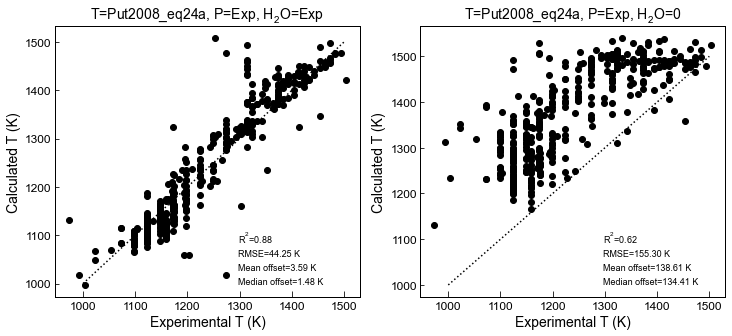

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_24a_FixedP, 'ok')
ax2.plot(xT, y_24a_FixedP_noH, 'ok')
ax1.plot([1000, 1500], [1000, 1500], ':k')
ax2.plot([1000, 1500], [1000, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Eq_24a_FixedP
model_Eq=Eq_24a_FixedP_noH
ax1.set_title('T=Put2008_eq24a, P=Exp, H$_2$O=Exp')
ax2.set_title('T=Put2008_eq24a, P=Exp, H$_2$O=0')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_eq24a_knownP.png')

## 24a, P=0

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


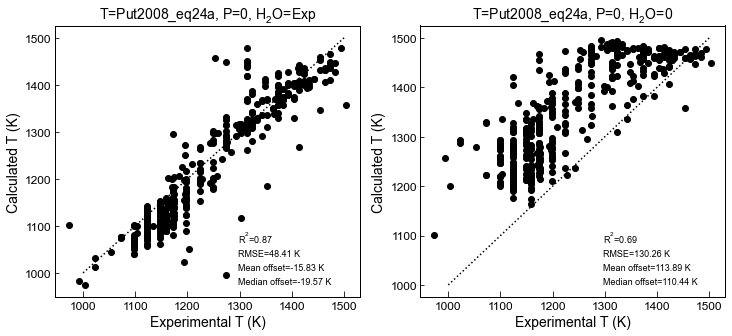

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_24a_P0, 'ok')
ax2.plot(xT, y_24a_P0_noH, 'ok')
ax1.plot([1000, 1500], [1000, 1500], ':k')
ax2.plot([1000, 1500], [1000, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Eq_24a_FixedP_P0
model_Eq=Eq_24a_FixedP_P0_noH
ax1.set_title('T=Put2008_eq24a, P=0, H$_2$O=Exp')
ax2.set_title('T=Put2008_eq24a, P=0, H$_2$O=0')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_eq24a_P0.png')

## Equation 24a, known P

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


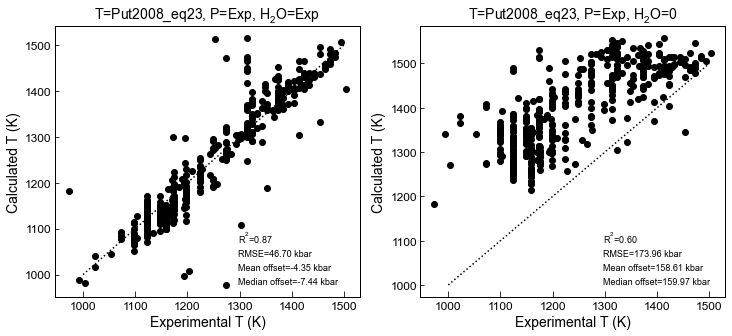

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_24a_FixedP, 'ok')
ax2.plot(xT, y_24a_FixedP_noH, 'ok')
ax1.plot([1000, 1500], [1000, 1500], ':k')
ax2.plot([1000, 1500], [1000, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Eq_24a_FixedP
model_Eq=Eq_24a_FixedP_noH
ax1.set_title('T=Put2008_eq24a, P=Exp, H$_2$O=Exp')
ax2.set_title('T=Put2008_eq24a, P=Exp, H$_2$O=0')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_eq24a_knownP.png')

## Equation 24a - P=0

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


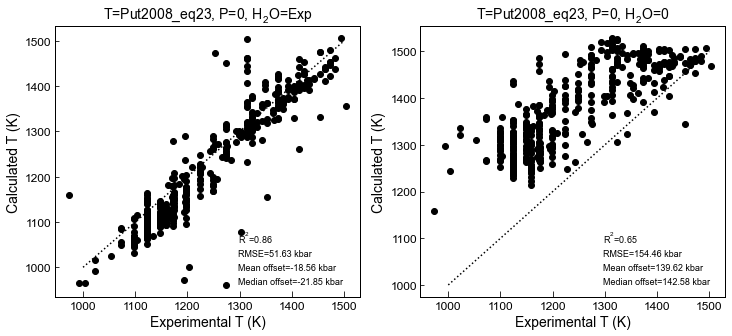

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(xT, y_24a_P0, 'ok')
ax2.plot(xT, y_24a_P0_noH, 'ok')
ax1.plot([1000, 1500], [1000, 1500], ':k')
ax2.plot([1000, 1500], [1000, 1500], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_Eq=Eq_24a_FixedP_P0
model_Eq=Eq_24a_FixedP_P0_noH
ax1.set_title('T=Put2008_eq24a, P=0, H$_2$O=Exp')
ax2.set_title('T=Put2008_eq24a, P=0, H$_2$O=0')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" kbar", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" kbar", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" kbar", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_eq24a_P0.png')


## Figure for Text - equation 29b, 28a

## Beattie for text

## Two felsic ones

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


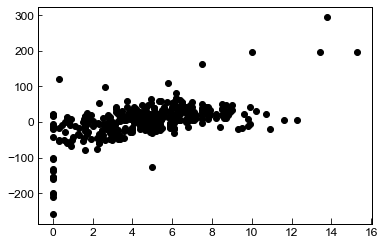

In [ ]:
plt.plot(Eq_tests_Short['H2O_Liq'], xT-y_24a_FixedP, 'ok')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


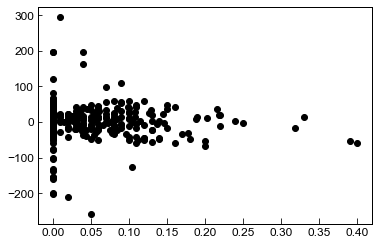

In [ ]:
plt.plot(Eq_tests_Short['TiO2_Plag'], xT-y_24a_FixedP, 'ok')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


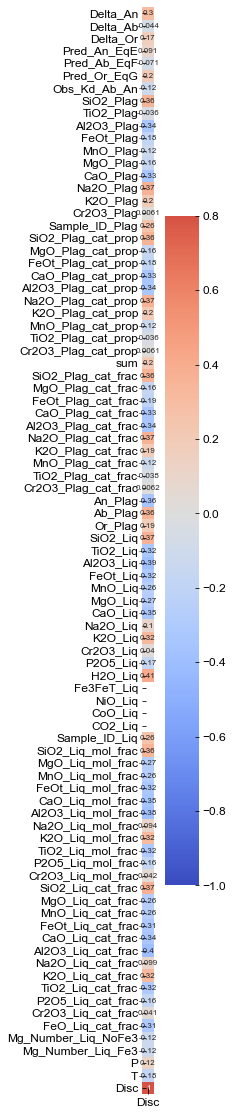

In [ ]:
Eq_tests_Short=Eq_tests.loc[Press_new&(Eq_Mask)]

Eq_tests['Disc']=xT-y_24a_FixedP
import seaborn as sns
#dataM['P_kbar_x']
corrmat = Eq_tests_Short.corr()
f, ax = plt.subplots(figsize=(4, 20))
x1=corrmat[['Disc']]
sns.heatmap(x1, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

# Hygrometry

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Using just experiments with Quant measurements of water

In [ ]:
xH=Plag_Glass['H2O_Liq'].loc[Press_new&(Eq_Mask)&Quantmethod]

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Out_25b_FixedT=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Put2008_eq25b", T=Plag_Glass['T_K_x'], P=Plag_Glass['P_kbar_x']).H2O_calc
y_25b_FixedT=Out_25b_FixedT.loc[Press_new&(Eq_Mask)&Quantmethod]
Eq_25b_FixedT=pt.calculate_R2(xH,y_25b_FixedT) 
TDict_25b_FixedT = {'R$^{2}$': Eq_25b_FixedT['R2'], 'p val': Eq_25b_FixedT['P_val'], 
                   'RMSE (wt%)': Eq_25b_FixedT['RMSE'], 'Median Error (wt%)': Eq_25b_FixedT['Median'], 'Mean Error (wt%)': Eq_25b_FixedT['Mean']}

Out_WL2015_FixedT=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Waters2015", T=Plag_Glass['T_K_x'],  P=Plag_Glass['P_kbar_x']).H2O_calc
y_WL2015_FixedT=Out_WL2015_FixedT.loc[Press_new&(Eq_Mask)&Quantmethod]
Eq_WL2015_FixedT=pt.calculate_R2(xH,y_WL2015_FixedT) 
TDict_WL2015_FixedT = {'R$^{2}$': Eq_WL2015_FixedT['R2'], 'p val': Eq_WL2015_FixedT['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_FixedT['RMSE'], 'Median Error (wt%)': Eq_WL2015_FixedT['Median'], 'Mean Error (wt%)': Eq_WL2015_FixedT['Mean']}

Out_H_FixedT=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Put2005_eqH", T=Plag_Glass['T_K_x'],  P=Plag_Glass['P_kbar_x']).H2O_calc
y_H_FixedT=Out_H_FixedT.loc[Press_new&(Eq_Mask)&Quantmethod]
Eq_H_FixedT=pt.calculate_R2(xH,y_H_FixedT) 
TDict_H_FixedT = {'R$^{2}$': Eq_H_FixedT['R2'], 'p val': Eq_H_FixedT['P_val'], 
                   'RMSE (wt%)': Eq_H_FixedT['RMSE'], 'Median Error (wt%)': Eq_H_FixedT['Median'], 'Mean Error (wt%)': Eq_H_FixedT['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


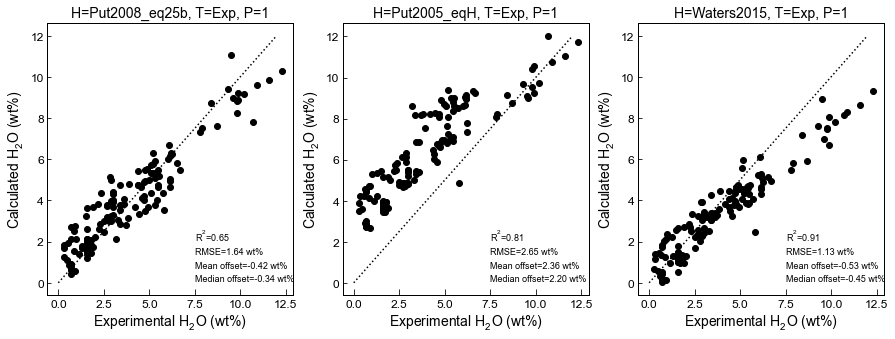

In [ ]:
a=12
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,5))
ax1.plot(xH, y_25b_FixedT, 'ok')
ax2.plot(xH, y_H_FixedT, 'ok')
ax3.plot(xH, y_WL2015_FixedT, 'ok')

ax1.plot([0, a], [0, a], ':k')
ax2.plot([0, a], [0, a], ':k')
ax3.plot([0, a], [0, a], ':k')
ax1.set_ylabel('Calculated H$_2$O (wt%)')
ax1.set_xlabel('Experimental H$_2$O (wt%)')
ax2.set_ylabel('Calculated H$_2$O (wt%)')
ax2.set_xlabel('Experimental H$_2$O (wt%)')
ax3.set_ylabel('Calculated H$_2$O (wt%)')
ax3.set_xlabel('Experimental H$_2$O (wt%)')
model_H_E=Eq_25b_FixedT
model_Eq=Eq_H_FixedT
model3_Eq=Eq_WL2015_FixedT
ax1.set_title('H=Put2008_eq25b, T=Exp, P=1')
ax2.set_title('H=Put2005_eqH, T=Exp, Pind')
ax3.set_title('H=Waters2015, T=Exp, P=1')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax3.annotate("R$^{2}$="+str(model3_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(model3_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(model3_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(model3_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_H_TExp.png')


## Using inverse of quant ones

In [ ]:
xH_noQuant=Plag_Glass['H2O_Liq'].loc[Press_new&(Eq_Mask)&(~Quantmethod)]

In [ ]:
Out_25b_FixedT_nonQuant=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Put2008_eq25b", T=Plag_Glass['T_K_x'], P=Plag_Glass['P_kbar_x']).H2O_calc
y_25b_FixedT_nonQuant=Out_25b_FixedT_nonQuant.loc[Press_new&(Eq_Mask)&(~Quantmethod)]
Eq_25b_FixedT_nonQuant=pt.calculate_R2(xH_noQuant,y_25b_FixedT_nonQuant) 
TDict_25b_FixedT_nonQuant = {'R$^{2}$': Eq_25b_FixedT_nonQuant['R2'], 'p val': Eq_25b_FixedT_nonQuant['P_val'], 
                   'RMSE (wt%)': Eq_25b_FixedT_nonQuant['RMSE'], 'Median Error (wt%)': Eq_25b_FixedT_nonQuant['Median'], 'Mean Error (wt%)': Eq_25b_FixedT_nonQuant['Mean']}

Out_WL2015_FixedT_nonQuant=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Waters2015", T=Plag_Glass['T_K_x'],  P=Plag_Glass['P_kbar_x']).H2O_calc

y_WL2015_FixedT_nonQuant=Out_WL2015_FixedT_nonQuant.loc[Press_new&(Eq_Mask)&(~Quantmethod)]
Eq_WL2015_FixedT_nonQuant=pt.calculate_R2(xH_noQuant,y_WL2015_FixedT_nonQuant) 
TDict_WL2015_FixedT_nonQuant = {'R$^{2}$': Eq_WL2015_FixedT_nonQuant['R2'], 'p val': Eq_WL2015_FixedT_nonQuant['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_FixedT_nonQuant['RMSE'], 'Median Error (wt%)': Eq_WL2015_FixedT_nonQuant['Median'], 'Mean Error (wt%)': Eq_WL2015_FixedT_nonQuant['Mean']}

Out_H_FixedT_nonQuant=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1, equationH="H_Put2005_eqH", T=Plag_Glass['T_K_x'],  P=Plag_Glass['P_kbar_x']).H2O_calc
y_H_FixedT_nonQuant=Out_H_FixedT_nonQuant.loc[Press_new&(Eq_Mask)&(~Quantmethod)]
Eq_H_FixedT_nonQuant=pt.calculate_R2(xH_noQuant,y_H_FixedT_nonQuant) 
TDict_H_FixedT_nonQuant = {'R$^{2}$': Eq_H_FixedT_nonQuant['R2'], 'p val': Eq_H_FixedT_nonQuant['P_val'], 
                   'RMSE (wt%)': Eq_H_FixedT_nonQuant['RMSE'], 'Median Error (wt%)': Eq_H_FixedT_nonQuant['Median'], 'Mean Error (wt%)': Eq_H_FixedT_nonQuant['Mean']}


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


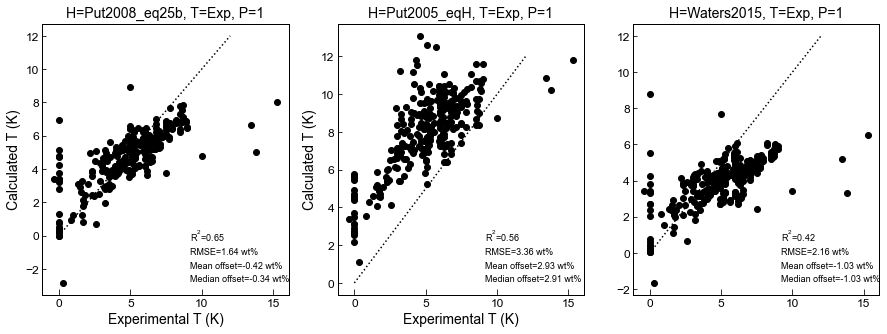

In [ ]:
a=12
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15,5))
ax1.plot(xH_noQuant, y_25b_FixedT_nonQuant, 'ok')
ax2.plot(xH_noQuant, y_H_FixedT_nonQuant, 'ok')
ax3.plot(xH_noQuant, y_WL2015_FixedT_nonQuant, 'ok')

ax1.plot([0, a], [0, a], ':k')
ax2.plot([0, a], [0, a], ':k')
ax3.plot([0, a], [0, a], ':k')
ax1.set_ylabel('Calculated T (K)')
ax2.set_ylabel('Calculated T (K)')
ax1.set_xlabel('Experimental T (K)')
ax2.set_xlabel('Experimental T (K)')
model_H_E=Eq_25b_FixedT_nonQuant
model_Eq=Eq_H_FixedT_nonQuant
model3_Eq=Eq_WL2015_FixedT_nonQuant
ax1.set_title('H=Put2008_eq25b, T=Exp, P=1')
ax2.set_title('H=Put2005_eqH, T=Exp, P=1')
ax3.set_title('H=Waters2015, T=Exp, P=1')
ax1.annotate("R$^{2}$="+str(model_H_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax3.annotate("R$^{2}$="+str(model3_Eq['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax3.annotate("RMSE="+str(model3_Eq['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax3.annotate("Mean offset="+str(model3_Eq['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax3.annotate("Median offset="+str(model3_Eq['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)
fig.savefig(r'../Calibration_Datasets/Plag_Liq_H_TExp.png')


## Iterate with equation 24a, equation Waters 2015

In [ ]:
iterations=100
H2O_iter=np.empty(len(myLiquids1), dtype=float)
T_iter_24a_W2015=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    H2O_iter_24a_W2015=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Waters2015", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_W2015)
    T_iter_24a_W2015=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_W2015['H2O_calc'])
    


# Iterate equation 24 with waters 2015

In [ ]:
iterations=100
H2O_iter=np.empty(len(myLiquids1), dtype=float)
T_iter_24a_W2015=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    H2O_iter_24a_W2015=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Waters2015", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_W2015)
    T_iter_24a_W2015=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_W2015['H2O_calc'])
    

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Iterating 24a with 25

In [ ]:
iterations=100
T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    i= _
    H2O_iter_24a_25b=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_25b)
    T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_25b['H2O_calc'])
    Stats_H=pt.calculate_R2(xH[Quantmethod], H2O_iter_24a_25b['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])
    Stats_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_25b.loc[Press_new&(Eq_Mask)&Quantmethod])

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
iterations=100
T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    i= _
    H2O_iter_24a_25b=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_25b)
    T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_25b['H2O_calc'])
    Stats_H=pt.calculate_R2(xH[Quantmethod], H2O_iter_24a_25b['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])
    Stats_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_25b.loc[Press_new&(Eq_Mask)&Quantmethod])

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
xH, H2O_iter_24a_W2015['H2O_Liq'].loc[Press_new&(Eq_Mask)&Quantmethod]

(305    0.700000
 306    0.700000
 307    0.700000
 308    1.600000
 309    1.700000
          ...   
 613    6.001886
 614    6.155390
 615    6.250000
 616    5.200000
 617    6.110000
 Name: H2O_Liq, Length: 140, dtype: float64,
 305    0.700000
 306    0.700000
 307    0.700000
 308    1.600000
 309    1.700000
          ...   
 613    6.001886
 614    6.155390
 615    6.250000
 616    5.200000
 617    6.110000
 Name: H2O_Liq, Length: 140, dtype: float64)

In [ ]:
Eq_WL2015_24a_H=pt.calculate_R2(xH, H2O_iter_24a_W2015['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_WL2015_24a_H = {'R$^{2}$': Eq_WL2015_24a_H['R2'], 'p val': Eq_WL2015_24a_H['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_24a_H['RMSE'], 'Median Error (wt%)': Eq_WL2015_24a_H['Median'], 'Mean Error (wt%)': Eq_WL2015_24a_H['Mean']}

Eq_WL2015_24a_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_W2015.loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_WL2015_24a_T = {'R$^{2}$': Eq_WL2015_24a_T['R2'], 'p val': Eq_WL2015_24a_T['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_24a_T['RMSE'], 'Median Error (wt%)': Eq_WL2015_24a_T['Median'], 'Mean Error (wt%)': Eq_WL2015_24a_T['Mean']}

Eq_WL2015_24a_H=pt.calculate_R2(xH, H2O_iter_24a_W2015['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_WL2015_24a_H = {'R$^{2}$': Eq_WL2015_24a_H['R2'], 'p val': Eq_WL2015_24a_H['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_24a_H['RMSE'], 'Median Error (wt%)': Eq_WL2015_24a_H['Median'], 'Mean Error (wt%)': Eq_WL2015_24a_H['Mean']}

Eq_WL2015_24a_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_W2015.loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_WL2015_24a_T = {'R$^{2}$': Eq_WL2015_24a_T['R2'], 'p val': Eq_WL2015_24a_T['P_val'], 
                   'RMSE (wt%)': Eq_WL2015_24a_T['RMSE'], 'Median Error (wt%)': Eq_WL2015_24a_T['Median'], 'Mean Error (wt%)': Eq_WL2015_24a_T['Mean']}

Eq_25b_24a_H=pt.calculate_R2(xH, H2O_iter_24a_25b['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_25b_24a_H = {'R$^{2}$': Eq_25b_24a_H['R2'], 'p val': Eq_25b_24a_H['P_val'], 
                   'RMSE (wt%)': Eq_25b_24a_H['RMSE'], 'Median Error (wt%)': Eq_25b_24a_H['Median'], 'Mean Error (wt%)': Eq_25b_24a_H['Mean']}

Eq_25b_24a_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_25b.loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_25b_24a_T = {'R$^{2}$': Eq_25b_24a_T['R2'], 'p val': Eq_25b_24a_T['P_val'], 
                   'RMSE (wt%)': Eq_25b_24a_T['RMSE'], 'Median Error (wt%)': Eq_25b_24a_T['Median'], 'Mean Error (wt%)': Eq_25b_24a_T['Mean']}

Eq_25b_24a_H=pt.calculate_R2(xH, H2O_iter_24a_25b['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_25b_24a_H = {'R$^{2}$': Eq_25b_24a_H['R2'], 'p val': Eq_25b_24a_H['P_val'], 
                   'RMSE (wt%)': Eq_25b_24a_H['RMSE'], 'Median Error (wt%)': Eq_25b_24a_H['Median'], 'Mean Error (wt%)': Eq_25b_24a_H['Mean']}

Eq_25b_24a_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_25b.loc[Press_new&(Eq_Mask)&Quantmethod]) 
Dict_25b_24a_T = {'R$^{2}$': Eq_25b_24a_T['R2'], 'p val': Eq_25b_24a_T['P_val'], 
                   'RMSE (wt%)': Eq_25b_24a_T['RMSE'], 'Median Error (wt%)': Eq_25b_24a_T['Median'], 'Mean Error (wt%)': Eq_25b_24a_T['Mean']}

H2O_knownT=pd.DataFrame({'H=Put2005_eqH, T=Exp, P=1 kbar':pd.Series(TDict_H_FixedT),
                           'H=Put2008_eq25b, T=Exp, P=1 kbar' :pd.Series(TDict_25b_FixedT),
                        'H=Waters2015, T=Exp, P=1 kbar':pd.Series(TDict_WL2015_FixedT),
                         'H=Waters2015, T=Put2008_eq24a, P=1 kbar':pd.Series(Dict_WL2015_24a_H),
                         'H=Waters2015, T=Put2008_eq24a, P=1 kbar':pd.Series(Dict_WL2015_24a_H), 
                         'H=Put2008_eq25, T=Put2008_eq24a, P=1 kbar':pd.Series(Dict_25b_24a_H),  
                         'H=Put2008_eq25, T=Put2008_eq24a, P=1 kbar':pd.Series(Dict_25b_24a_H),                           
                         
                        }).T

H2O_knownT

,R$^{2}$,p val,RMSE (wt%),Median Error (wt%),Mean Error (wt%)
"H=Put2005_eqH, T=Exp, P=1 kbar",0.81,0.000,2.65,2.20,2.36
"H=Put2008_eq25b, T=Exp, P=1 kbar",0.89,0.000,0.96,0.17,0.13
"H=Waters2015, T=Exp, P=1 kbar",0.91,0.000,1.13,-0.45,-0.53
"H=Waters2015, T=Put2008_eq23, P=1 kbar",0.50,0.000,2.30,-0.98,-1.22
"H=Waters2015, T=Put2008_eq24a, P=1 kbar",0.46,0.000,2.45,-1.10,-1.38
"H=Put2008_eq25, T=Put2008_eq23, P=1 kbar",0.47,0.000,2.40,1.42,1.29
"H=Put2008_eq25, T=Put2008_eq24a, P=1 kbar",0.65,0.000,1.64,0.27,-0.04


In [ ]:
T_H_iter=pd.DataFrame({'T=Put2008_eq24a, H=Waters2015,  P=1 kbar':pd.Series(Dict_WL2015_24a_H),
                         'T=Put2008_eq24a, H=Waters2015, P=1 kbar':pd.Series(Dict_WL2015_24a_H), 
                         'T=Put2008_eq24a, H=Put2008_eq25,  P=1 kbar':pd.Series(Dict_25b_24a_H),  
                         'H=Put2008_eq25, T=Put2008_eq24a, P=1 kbar':pd.Series(Dict_25b_24a_H),                           
                         
                        }).T

T_H_iter

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,R$^{2}$,p val,RMSE (wt%),Median Error (wt%),Mean Error (wt%)
"T=Put2008_eq23, H=Waters2015, P=1 kbar",0.50,0.000,2.30,-0.98,-1.22
"T=Put2008_eq24a, H=Waters2015, P=1 kbar",0.46,0.000,2.45,-1.10,-1.38
"T=Put2008_eq23, H=Put2008_eq25, P=1 kbar",0.47,0.000,2.40,1.42,1.29
"H=Put2008_eq25, T=Put2008_eq24a, P=1 kbar",0.65,0.000,1.64,0.27,-0.04


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


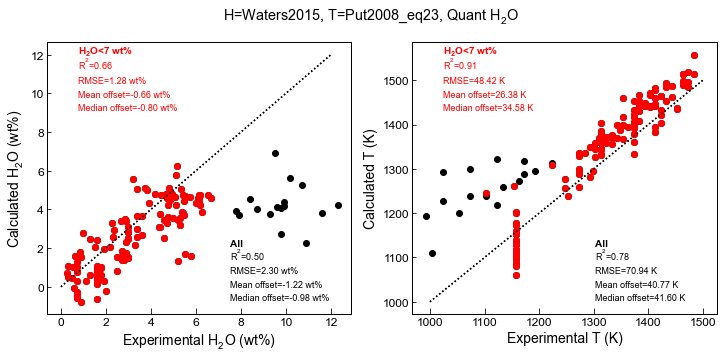

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
H2O_iter= H2O_iter_24a_W2015
T_iter=T_iter_24a_W2015
ax1.plot(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T=pt.calculate_R2(xT[Quantmethod], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod])
model_H=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])

ax1.annotate("R$^{2}$="+str(model_H['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_T['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_T['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_T['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_T['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


lowH2O=xH<7
ax1.plot(xH[lowH2O], H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod&lowH2O],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T_lowH=pt.calculate_R2(xT[Quantmethod&lowH2O], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])
model_H_lowH=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])

ax1.annotate("R$^{2}$="+str(model_H_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("RMSE="+str(model_H_lowH['RMSE'])+" wt%", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Mean offset="+str(model_H_lowH['Mean'])+" wt%", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Median offset="+str(model_H_lowH['Median'])+" wt%", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')

ax1.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')
ax1.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')
ax2.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')

ax2.annotate("R$^{2}$="+str(model_T_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("RMSE="+str(model_T_lowH['RMSE'])+" K", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Mean offset="+str(model_T_lowH['Mean'])+" K", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Median offset="+str(model_T_lowH['Median'])+" K", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
fig.suptitle("H=Waters2015, T=Put2008_eq24a, Quant H$_2$O")

ax2.set_ylabel('Calculated T (K)')
ax2.set_xlabel('Experimental T (K)')
ax1.set_ylabel('Calculated H$_2$O (wt%)')
ax1.set_xlabel('Experimental H$_2$O (wt%)')
fig.savefig(r'../Calibration_Datasets/Iter_H2O_Temp_24a_Waters2015.png')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


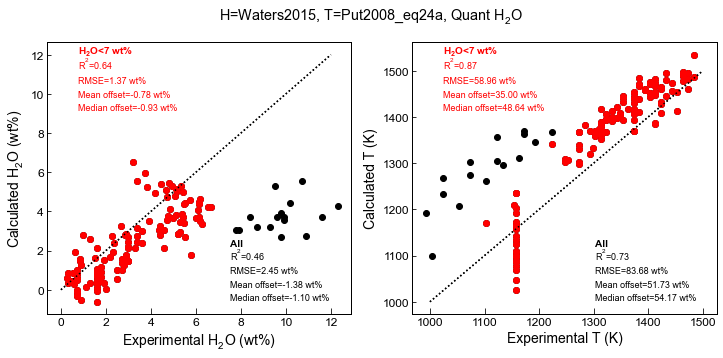

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
H2O_iter= H2O_iter_24a_W2015
T_iter=T_iter_24a_W2015
ax1.plot(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T=pt.calculate_R2(xT[Quantmethod], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod])
model_H=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])

ax1.annotate("R$^{2}$="+str(model_H['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_T['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_T['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_T['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_T['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


lowH2O=xH<7
ax1.plot(xH[lowH2O], H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod&lowH2O],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T_lowH=pt.calculate_R2(xT[Quantmethod&lowH2O], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])
model_H_lowH=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])

ax1.annotate("R$^{2}$="+str(model_H_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("RMSE="+str(model_H_lowH['RMSE'])+" wt%", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Mean offset="+str(model_H_lowH['Mean'])+" wt%", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Median offset="+str(model_H_lowH['Median'])+" wt%", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')

ax1.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')
ax1.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')
ax2.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')

ax2.annotate("R$^{2}$="+str(model_T_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("RMSE="+str(model_T_lowH['RMSE'])+" wt%", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Mean offset="+str(model_T_lowH['Mean'])+" wt%", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Median offset="+str(model_T_lowH['Median'])+" wt%", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
fig.suptitle("H=Waters2015, T=Put2008_eq24a, Quant H$_2$O")

ax2.set_ylabel('Calculated T (K)')
ax2.set_xlabel('Experimental T (K)')
ax1.set_ylabel('Calculated H$_2$O (wt%)')
ax1.set_xlabel('Experimental H$_2$O (wt%)')
fig.savefig(r'../Calibration_Datasets/Iter_H2O_Temp_24a_Waters2015.png')

In [ ]:
iterations=100
H2O_iter=np.empty(len(myLiquids1), dtype=float)
R2_H=np.empty(iterations, dtype=float)
RMSE_H=np.empty(iterations, dtype=float)
Mean_H=np.empty(iterations, dtype=float)
Median_H=np.empty(iterations, dtype=float)
pval_H=np.empty(iterations, dtype=float)
pval_T=np.empty(iterations, dtype=float)
i_x=np.empty(iterations, dtype=float)

R2_T=np.empty(iterations, dtype=float)
RMSE_T=np.empty(iterations, dtype=float)
Mean_T=np.empty(iterations, dtype=float)
Median_T=np.empty(iterations, dtype=float)

T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    i= _
    H2O_iter_24a_25b=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_25b)
    T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_25b['H2O_calc'])
    Stats_H=pt.calculate_R2(xH[Quantmethod], H2O_iter_24a_25b['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])
    Stats_T=pt.calculate_R2(xT[Quantmethod], T_iter_24a_25b.loc[Press_new&(Eq_Mask)&Quantmethod])
    
    i_x[i]=i
    R2_H[i]=Stats_H['R2']
    RMSE_H[i]=Stats_H['RMSE'] 
    Mean_H[i]=Stats_H['Mean']
    Median_H[i]=Stats_H['Median']
    R2_T[i]=Stats_T['R2']
    RMSE_T[i]=Stats_T['RMSE'] 
    Mean_T[i]=Stats_T['Mean']
    Median_T[i]=Stats_T['Median'] 
    pval_T[i]=Stats_T['P_val'] 
    pval_H[i]=Stats_H['P_val']     

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


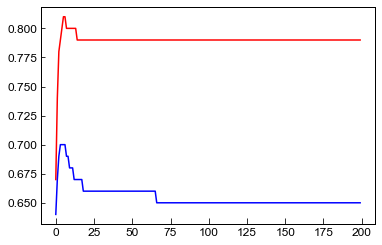

In [ ]:
plt.plot(i_x, R2_T, '-r')
plt.plot(i_x, R2_H, '-b')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-278-aaf05fac2918>:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


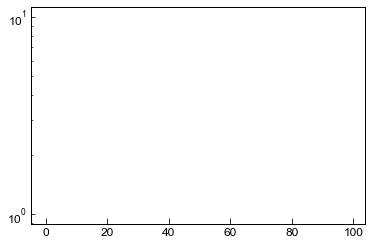

In [ ]:
plt.plot(i_x, pval_T, '-b')
plt.plot(i_x, pval_H, '-r')
plt.yscale('log')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


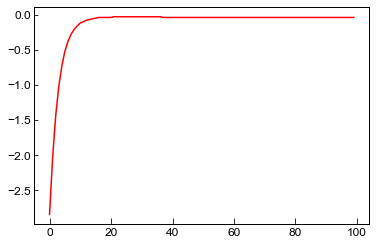

In [ ]:
plt.plot(i_x, Mean, '-r')

In [ ]:
Mean=np.empty(iterations, dtype=float)
for _ in range (iterations):
    i= _
    Mean[i]=i
Mean

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


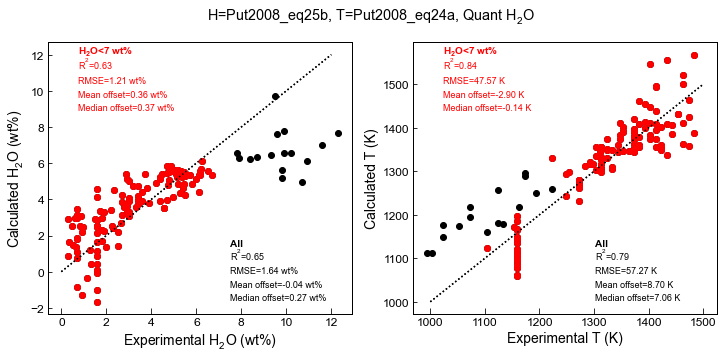

In [ ]:

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
H2O_iter= H2O_iter_24a_25b
T_iter=T_iter_24a_25b
ax1.plot(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T=pt.calculate_R2(xT[Quantmethod], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod])
model_H=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])

ax1.annotate("R$^{2}$="+str(model_H['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_T['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_T['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_T['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_T['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


lowH2O=xH<7
ax1.plot(xH[lowH2O], H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod&lowH2O],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T_lowH=pt.calculate_R2(xT[Quantmethod&lowH2O], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])
model_H_lowH=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])

ax1.annotate("R$^{2}$="+str(model_H_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("RMSE="+str(model_H_lowH['RMSE'])+" wt%", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Mean offset="+str(model_H_lowH['Mean'])+" wt%", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Median offset="+str(model_H_lowH['Median'])+" wt%", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')

ax1.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')
ax1.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')
ax2.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')

ax2.annotate("R$^{2}$="+str(model_T_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("RMSE="+str(model_T_lowH['RMSE'])+" K", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Mean offset="+str(model_T_lowH['Mean'])+" K", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Median offset="+str(model_T_lowH['Median'])+" K", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
fig.suptitle("H=Put2008_eq25b, T=Put2008_eq24a, Quant H$_2$O")

ax2.set_ylabel('Calculated T (K)')
ax2.set_xlabel('Experimental T (K)')
ax1.set_ylabel('Calculated H$_2$O (wt%)')
ax1.set_xlabel('Experimental H$_2$O (wt%)')
fig.savefig(r'../Calibration_Datasets/Iter_H2O_Temp_24a_25b.png')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


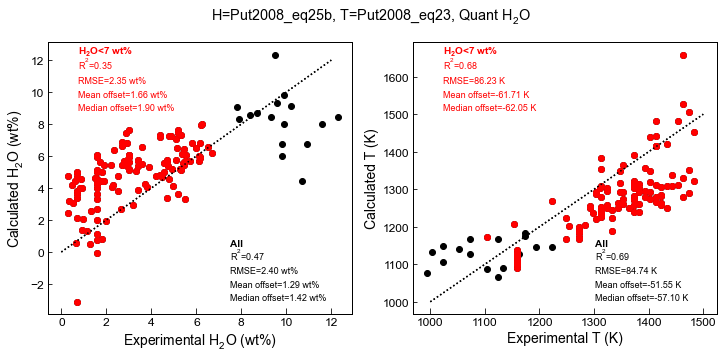

In [ ]:
iterations=100
H2O_iter=np.empty(len(myLiquids1), dtype=float)
T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=0)

for _ in range (iterations):
    H2O_iter_24a_25b=pt.calculate_Plag_Liq_Hygr(liq_comps=myLiquids1, plag_comps=myPlags1,  
                                        equationH="H_Put2008_eq25b", 
                                           P=Plag_Glass['P_kbar_x'], T=T_iter_24a_25b)
    T_iter_24a_25b=pt.calculate_Fspar_Liq_Temp(liq_comps=myLiquids1, plag_comps=myPlags1, equationT="T_Put2008_eq24a",
                           P=Plag_Glass['P_kbar_x'], H2O_Liq=H2O_iter_24a_25b['H2O_calc'])
    
    
    
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))
H2O_iter= H2O_iter_24a_25b
T_iter=T_iter_24a_25b
ax1.plot(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod], 'ok')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T=pt.calculate_R2(xT[Quantmethod], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod])
model_H=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod])

ax1.annotate("R$^{2}$="+str(model_H['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax1.annotate("RMSE="+str(model_H['RMSE'])+" wt%", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax1.annotate("Mean offset="+str(model_H['Mean'])+" wt%", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax1.annotate("Median offset="+str(model_H['Median'])+" wt%", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)

ax2.annotate("R$^{2}$="+str(model_T['R2']), xy=(0.6, 0.2), xycoords="axes fraction", fontsize=9)
ax2.annotate("RMSE="+str(model_T['RMSE'])+" K", xy=(0.6, 0.15), xycoords="axes fraction", fontsize=9)
ax2.annotate("Mean offset="+str(model_T['Mean'])+" K", xy=(0.6, 0.1), xycoords="axes fraction", fontsize=9)
ax2.annotate("Median offset="+str(model_T['Median'])+" K", xy=(0.6, 0.05), xycoords="axes fraction", fontsize=9)


lowH2O=xH<7
ax1.plot(xH[lowH2O], H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax1.plot([0, 12], [0, 12], ':k')

ax2.plot(xT[Quantmethod&lowH2O],  T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O], 'or')
ax2.plot([1000, 1500], [1000, 1500], ':k')

model_T_lowH=pt.calculate_R2(xT[Quantmethod&lowH2O], T_iter.loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])
model_H_lowH=pt.calculate_R2(xH, H2O_iter['H2O_calc'].loc[Press_new&(Eq_Mask)&Quantmethod&lowH2O])

ax1.annotate("R$^{2}$="+str(model_H_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("RMSE="+str(model_H_lowH['RMSE'])+" wt%", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Mean offset="+str(model_H_lowH['Mean'])+" wt%", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax1.annotate("Median offset="+str(model_H_lowH['Median'])+" wt%", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')

ax1.annotate("H$_2$O<7 wt%", xy=(0.1, 0.96), xycoords="axes fraction", fontsize=10, weight='bold', color='red')
ax1.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')
ax2.annotate("All", xy=(0.6, 0.25), xycoords="axes fraction", fontsize=10, weight='bold', color='black')

ax2.annotate("R$^{2}$="+str(model_T_lowH['R2']), xy=(0.1, 0.9), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("RMSE="+str(model_T_lowH['RMSE'])+" K", xy=(0.1, 0.85), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Mean offset="+str(model_T_lowH['Mean'])+" K", xy=(0.1, 0.8), xycoords="axes fraction", fontsize=9, color='red')
ax2.annotate("Median offset="+str(model_T_lowH['Median'])+" K", xy=(0.1, 0.75), xycoords="axes fraction", fontsize=9, color='red')
fig.suptitle("H=Put2008_eq25b, T=Put2008_eq24a, Quant H$_2$O")

ax2.set_ylabel('Calculated T (K)')
ax2.set_xlabel('Experimental T (K)')
ax1.set_ylabel('Calculated H$_2$O (wt%)')
ax1.set_xlabel('Experimental H$_2$O (wt%)')
fig.savefig(r'../Calibration_Datasets/Iter_H2O_Temp_24a_25b.png')